In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
y = df.iloc[:, :2].values
X = df.iloc[:, 2:].values

## Splitting & Using GB


In [4]:
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
def create_multiclass_target(y):
    return np.where((y[:, 0] == 0) & (y[:, 1] == 0), 0,
                    np.where((y[:, 0] == 1) & (y[:, 1] == 1), 1,
                             np.where((y[:, 0] == 0) & (y[:, 1] == 1), 2, 3)))

y_multiclass = create_multiclass_target(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)


## Using Evaluation Metrics

Accuracy =  86.0 %
Precision =  0.8451616132723112
Recall =  0.855907029478458
F1-score =  0.8497820125844319


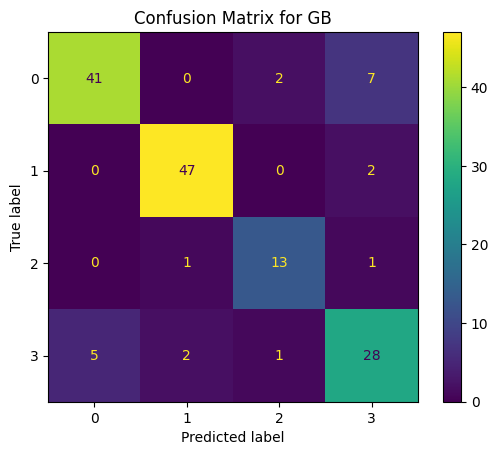

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.94      0.96      0.95        49
           2       0.81      0.87      0.84        15
           3       0.74      0.78      0.76        36

    accuracy                           0.86       150
   macro avg       0.85      0.86      0.85       150
weighted avg       0.86      0.86      0.86       150



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_train))
disp.plot()
plt.title('Confusion Matrix for GB')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve, train_test_split
# from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.datasets import make_classification

# # Define the function to plot the learning curve
# def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
    
#     # Compute learning curve
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
#     )
    
#     # Calculate mean and standard deviation of training and test scores
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     # Plot the learning curve
#     plt.grid()
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# # Initialize classifiers
# classifiers = {
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Random Forest": RandomForestClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machine": SVC()
# }

# # Plot learning curves for each classifier
# for name, clf in classifiers.items():
#     plot_learning_curve(clf, X_train, y_train, title=f"Learning Curve ({name})")
#     plt.show()


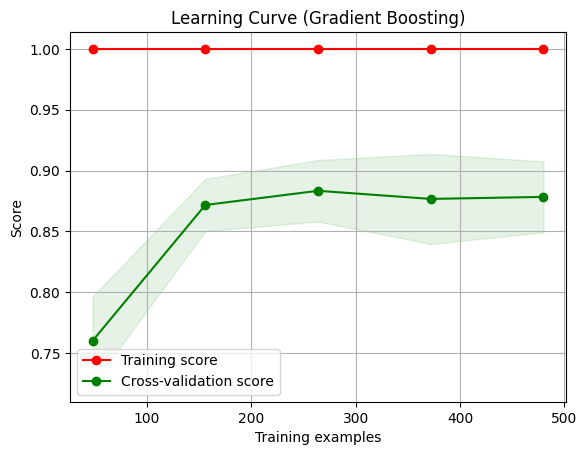

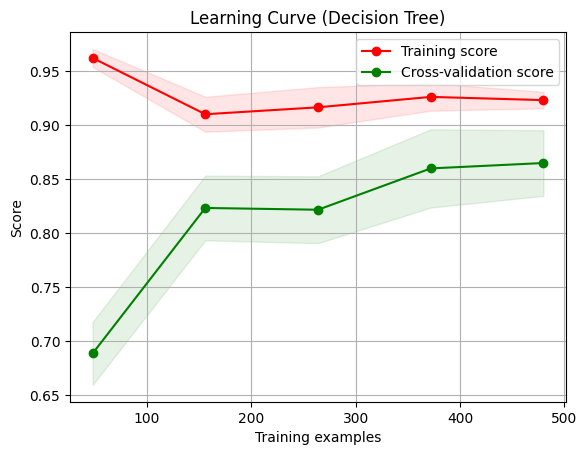

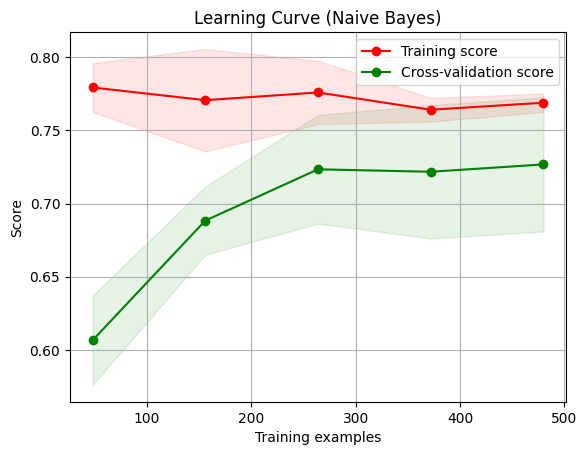

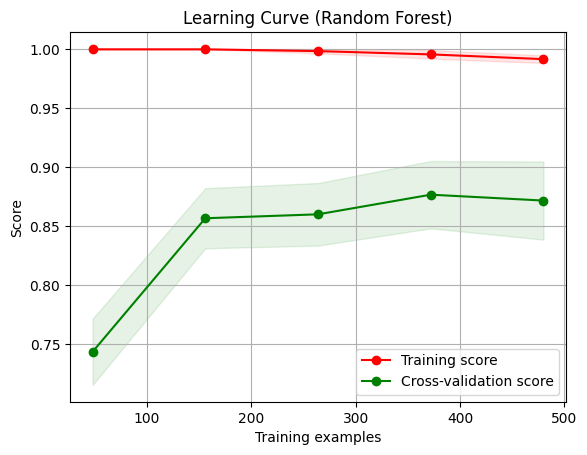

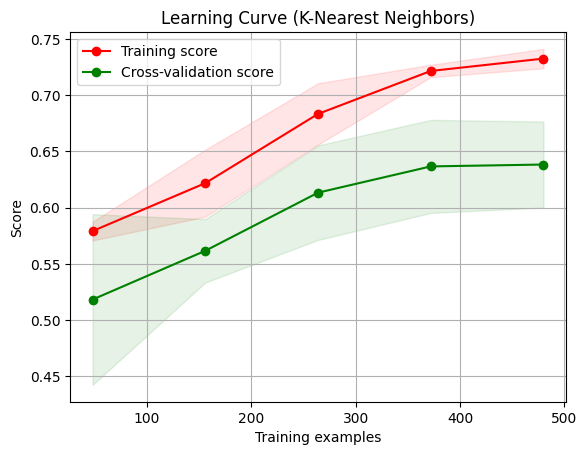

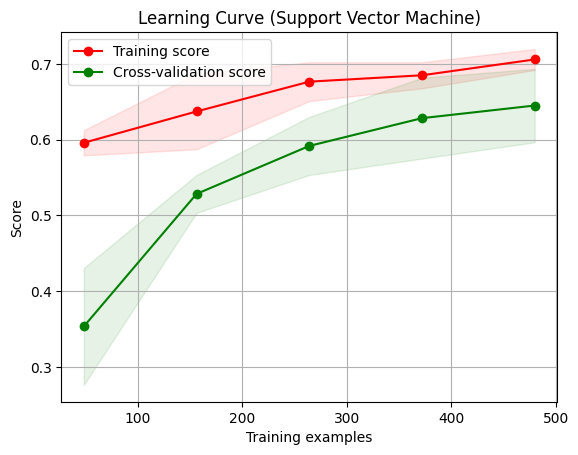

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Define parameter grids for some classifiers
param_grids = {
    "Gradient Boosting": {'n_estimators': 100, 'max_depth': 3},
    "Decision Tree": {'max_depth': 5, 'min_samples_split': 10},
    "Naive Bayes": {},  # No parameters to set for GaussianNB
    "Random Forest": {'n_estimators': 100, 'max_depth': 10},
    "K-Nearest Neighbors": {'n_neighbors': 5},
    "Support Vector Machine": {'C': 1.0, 'kernel': 'rbf'}
}

classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(**param_grids["Gradient Boosting"]),
    "Decision Tree": DecisionTreeClassifier(**param_grids["Decision Tree"]),
    "Naive Bayes": GaussianNB(**param_grids["Naive Bayes"]),
    "Random Forest": RandomForestClassifier(**param_grids["Random Forest"]),
    "K-Nearest Neighbors": KNeighborsClassifier(**param_grids["K-Nearest Neighbors"]),
    "Support Vector Machine": SVC(**param_grids["Support Vector Machine"])
}

for name, clf in classifiers.items():
    plot_learning_curve(clf, X_train, y_train, title=f"Learning Curve ({name})")
    plt.show()


[LightGBM] [Info] Number of positive: 192, number of negative: 408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320000 -> initscore=-0.753772
[LightGBM] [Info] Start training from score -0.753772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

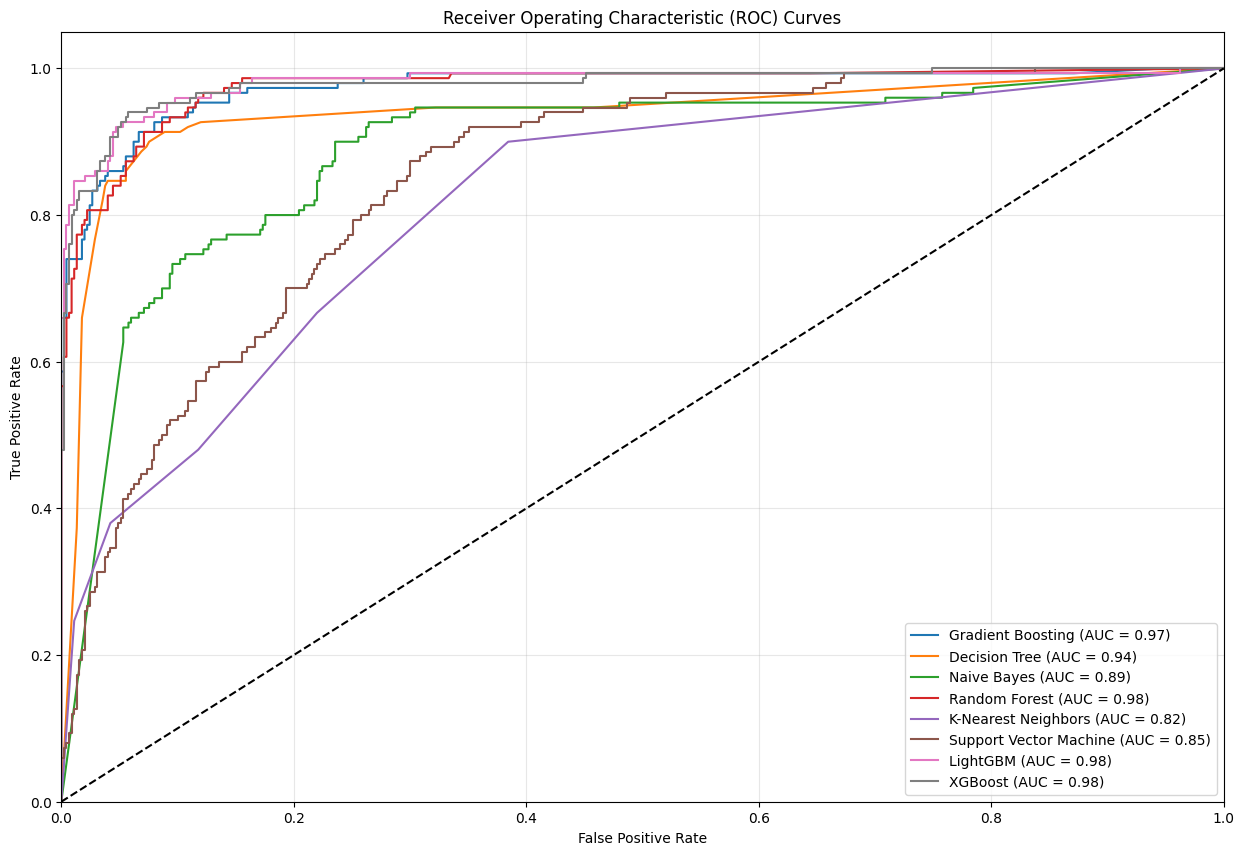

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Generate synthetic data (replace this with your actual dataset)
y_bin = label_binarize(y_multiclass, classes=[0, 1, 2,3])
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Gradient Boosting": OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, max_depth=3)),
    "Decision Tree": OneVsRestClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=10)),
    "Naive Bayes": OneVsRestClassifier(GaussianNB()),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=10)),
    "K-Nearest Neighbors": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)),
    "Support Vector Machine": OneVsRestClassifier(SVC(probability=True, C=1.0, kernel='rbf')),
    "LightGBM": OneVsRestClassifier(LGBMClassifier(n_estimators=100, max_depth=-1)),
    "XGBoost": OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
}

# Function to plot the AUC-ROC curve
def plot_roc_curve(classifiers, X_test, y_test):
    plt.figure(figsize=(15, 10))
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)
        
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = roc_auc_score(y_test, y_score, average="micro")

        plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (AUC = {roc_auc["micro"]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# Plot ROC curve for all classifiers
plot_roc_curve(classifiers, X_test, y_test)
